#### Names:
- Lucas Mateos
- Tania Gonzalo
- Deyanira Borroto

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The next line indicates to matplotlib to show the plots inline in the notebook
%matplotlib inline

# Programming assignment 

You have program (in couples) a series of functions in order to generate a protein translation table. A protein is created from a sequence of nucleic acids codified in the messenger RNA (mRNA). This mRNA is read by the ribosome three bases at a time (called codons) to add one amino acid to the protein. In total there are $4^3=64$ different codons that correspond to the possible combinations of three bases.  Each codon codifies a single amino acid. The mRNA has one start codon that always codifies M and an end codon that signals the end of the protein.

The objective of this assignment is to generate this translation table. To do so you will have to:

+ Read the genome of a species from a FASTA file
+ Read the annotation file for that genome to extract the location in the genome of the Coding Sequences (CDS) for each protein
+ Extract the mRNAs from the genome that codifies each protein using its location 
+ Read the proteins from a FASTA file
+ Generate the translation table using pairs of mRNA and protein


In the following you will find the template of the functions to use and some other interesting execises 

*************************************************

# File parsing 

Implement the function below to parse a fasta file. Find an example of a fasta format file here:
***
<pre>>NC_000907.1:1073118-1073456 Haemophilus influenzae Rd KW20 chromoso
ATGAAAACATTATTCACTTCGGTTGTATTGTGTGGTGCGCTGGTTGTTTCTTCGTCTTTTGCTGAGGAAA
AAGCGACAGANCAAACCGCTCAATCTGTTGTGACAACTCAAGCTGAAGCTCAAGTAGCACCAGCCGTAGT
GAGCGATAAATTGAATATCAACACAGCAACTGCCAGTGAAATTCAAAAATCCTTAACTGGCATTGGTGCG
AAAAAAGCGGAAGCTATTGTGCAATATCGTGAAAAACACGGTAATTTTKCTAATGCAGAACAGCTTTTAG
AAGTACAAGGAATTGGCAAAGCAACACTAGAGAAAAATCGTGATCGTATAATCTTTTAA
</pre>
***


#### Read FASTA

In [2]:
def readFasta(file):
    """ Reads all sequences of a FASTA file 
        returns a dictionary """  
    sequences = {}
    try:
        with open(file, 'r') as f:
            identifier = None
            seq = ""
            for line in f:
                line = line.strip()
                if line.startswith(">"):
                    if identifier:
                        sequences[identifier] = seq
                    identifier = line[1: line.find(" ")]  
                    seq = ""
                else:
                    seq += line

            if identifier:
                sequences[identifier] = seq
    except IOError:
        print(f"Error: Could not read file {file}")
    
    return sequences

In [3]:
# Cell for checking if readFasta is working
seqs = readFasta("phix174/phix.fa")
#print(seqs['gi|216019|gb|J02482.1|PX1CG'])
# Check that the number of sequences is one
assert(len(seqs)==1)
# Check that the length of the sequences is correct
assert(len(seqs['gi|216019|gb|J02482.1|PX1CG'])==5386)

print("All tests Ok")

All tests Ok


#### Some statistics

In [11]:
def countBases(seq, bases = []):
    """ Counts the number of occurrences of each base in the sequence seq
        There are two return values: the list of bases and the list of counts
    """
    if len(bases) == 0:
        bases = list(set(seq))
    
    counts = [seq.count(base) for base in bases]
    return bases, counts


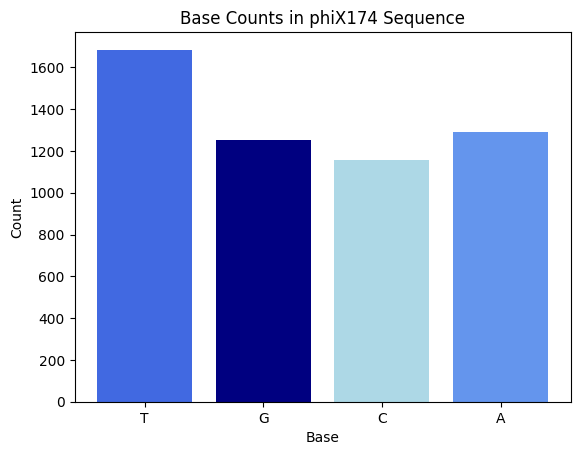

In [12]:
# Use matplotlib to show the histogram of bases for phiX174
import matplotlib.pyplot as plt
colour = ["royalblue", "navy", "lightblue", "cornflowerblue"]

sequence = readFasta("phix174/phix.fa")
for elem in sequence:
    seq = sequence[elem]
bases, counts = countBases(seq)

plt.bar(bases, counts, color = colour)
plt.xlabel('Base')
plt.ylabel('Count')
plt.title('Base Counts in phiX174 Sequence')
plt.show()

In [13]:
def GCContent(seq):
    """ Computes the percentage of GC content of a sequence.
        Note that N should be ignored. """
    GCs = 0
    total_nucleotides = 0
    
    if len(seq) == 0:
        return 0.0
    
    for i in seq:
        if i != 'N':
            total_nucleotides += 1
            if i == 'C' or i == 'G':
                GCs += 1
                
    if total_nucleotides == 0:
        return 0.0

    gc_content = (GCs / total_nucleotides)
    return gc_content

In [14]:
# Check that the GC content is correct
seqs = readFasta("phix174/phix.fa")
assert(GCContent(seqs['gi|216019|gb|J02482.1|PX1CG'])==0.44764203490531007)
# Check that the GC content is correct
seqs = readFasta("plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa")
assert(GCContent(seqs['NC_004325.1'])==0.20545724181242733)

print("All tests Ok")

All tests Ok


In [15]:
files = ["phix174/phix.fa", "homo_sapiens/homo_sapiens_chr21.fasta",
        "plamodium_falciparum/Plasmodium_falciparumchromosome_1.fa",
         "haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna",
         "arabidopsis_thaliana/GCF_000001735.3_TAIR10_genomic.fna"]

gcs = []
for file in files:
    seqs = readFasta(file)
    # Count only the first sequence
    keys = list(seqs.keys())
    gcs.append(GCContent(seqs[keys[0]]))
   
print(gcs)

[0.44764203490531007, 0.4093836151314954, 0.20545724181242733, 0.3814884716178203, 0.30435739990000565]


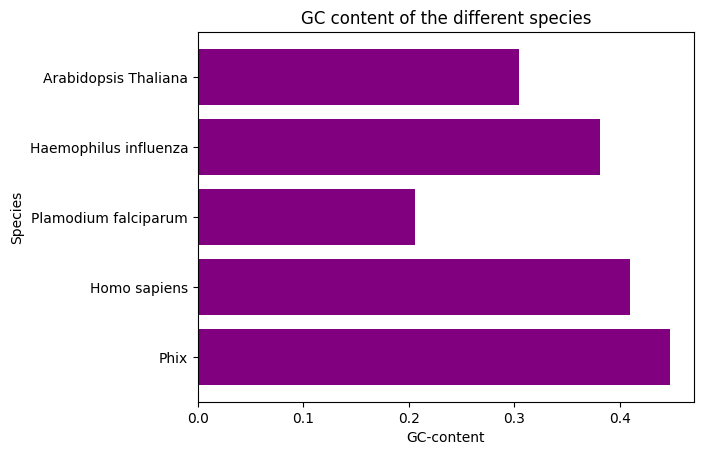

In [16]:
# Use matplotlib to show the GC content of the different species with a bar plot
color = ["purple"]

names = ['Phix','Homo sapiens', 'Plamodium falciparum', 'Haemophilus influenza', 'Arabidopsis Thaliana']
plt.barh(names, gcs, color = color)
plt.xlabel('GC-content')
plt.ylabel('Species')
plt.title('GC content of the different species')
plt.show()

#### Read FASTQ

In [17]:
def readFastq(file):
    """ Reads a FASTQ format file and returns sequences and quality scores. """
    reads = []
    quals = []
    
    with open(file, 'r') as f:
        while True:
            header = f.readline().strip()  
            if not header:  
                break
            read = f.readline().strip()    
            plus_line = f.readline().strip()
            quality = f.readline().strip()  
           
            reads.append(read)
            scores = [ord(char) - 33 for char in quality]  
            quals.append(scores) 

    return reads, quals

CPU times: user 22.1 ms, sys: 1.05 ms, total: 23.2 ms
Wall time: 177 ms


5.011872336272714e-10

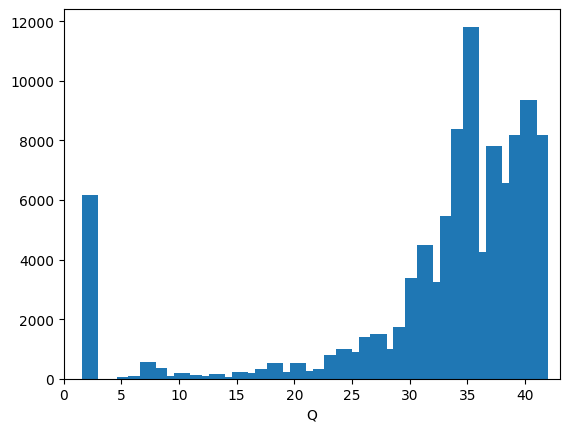

In [18]:
import math

# Use matplotlib to show the a histogram of Qs
%time rr, qq = readFastq('phix174/SRR835775_1.first1000.fastq')
#%time rr, qq = readFastq('sintetico/sample_01.fasta.fastq')

q = np.concatenate(qq,axis=0)
plt.xlabel('Q')
plt.xlim((0,43))
hh, bb = np.histogram(q,range(1,50))
plt.bar(np.arange(1,49),hh)
h = plt.hist(q,range(50))

math.pow(10,-(ord('~')-33)/10)


# Obtaining traslation tables

In [19]:
def complementary(gen):
    """ From a sequence of nucleotides return the inverse complementary
          e.g. GAACCT should return AGGTTC
          Hint: Use a dictionary for the translations
        """
    to_replace = {"A":"T","T":"A","G":"C","C":"G","K":"M", "M":"K", "Y":"R", "R":"Y",
                 "B":"V", "V":"B", "D":"H", "H":"D"}
    result = []
    for nucl in gen:
        if nucl in to_replace:
            result += to_replace[nucl]
        else:
            result += nucl
    complementary = ''.join(result)
    reverse_complement = complementary[::-1]
    return reverse_complement

In [20]:
# Tests
assert(complementary('G')=='C')
assert(complementary('AT')=='AT')
assert(complementary('GC')=='GC')
assert(complementary('GATACA')=='TGTATC')
# If you added all possible combination of bases uncomment the 
# following line to check
assert(complementary('GATACASWKMYRHDVBN')=='NVBHDYRKMWSTGTATC')

print('All tests OK!')

All tests OK!


In [21]:
def extractProteinId(attribs):
    """ Extract the protein_id from the complete string of the attributes 
        field of the gff """
    protein_id = attribs[attribs.find("protein_id=")+len("protein_id="):]
    i = protein_id.find(";")
    if i>=0:
        protein_id = protein_id[:i]
    return protein_id

def extractCDSFromGFF(gff_file):
    """ This function extract the regions information from a gff file for all CDSs.
       
        This function returns a dictionary with the protein_id being the keys and
        the values in a list with the sequence_id and tuples with (start, end, strand, frame)
       
        Note that a CDS might spread over multiple lines. For each line you should include
        one tuple.
    """
    cds_dict = {}
    with open(gff_file, 'r') as f:
        for line in f:
            if line[0] != "#":  
                campos = line.strip().split("\t")
                if campos[2] == "CDS":
                    protein_id = extractProteinId(campos[8])
                    if protein_id:
                        sequence_id = campos[0]
                        start = int(campos[3])   
                        end = int(campos[4])
                        strand = campos[6]
                        frame = int(campos [7])

                    if protein_id not in cds_dict:
                        cds_dict[protein_id] = [sequence_id,]
                    cds_dict[protein_id] += ((start, end, strand, frame),)

    return cds_dict

In [22]:
# Tests
assert(extractCDSFromGFF('haemophilus_influenzae/test1.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test2.gff')== {'NP_438174.1': ['NC_000907.1',  (2, 1021, '+', 0)],
                                                  'NP_438175.1': ['NC_000907.1',  (1190, 3013, '+', 0)],
                                                  'NP_438176.1': ['NC_000907.1', (3050, 3838, '-', 0)]})
assert(extractCDSFromGFF('haemophilus_influenzae/test3.gff')=={'NP_438174.1': ['NC_000907.1', (2, 1021, '+', 0)],
                 'NP_438271.2': ['NC_000907.1', (104277, 104318, '+', 0), (104318, 105274, '+',  0)]})
print('All test are OK!')

All test are OK!


In [23]:
def obtainTranslationTable(cds, protein):
    """ Creates a translation dictionary from the protein and DNA sequence.
        The function returns:
            1- A dictionary with the translation table where the codons are the
               keys of the dictionary and the amino acids the values.
            2- The start codon as a string
            
        Note 1: The sequence cds includes start and end codons. 
        Note 2: First codon always codifies M that is also included in the protein.
        Note 3: End codon do not codify an a aminoacid and should be included in the
                dictionary as *.
                
        Example: (Spaces added in seqeunces for readability) 
          cds     = GTG TTT TTG GTG TGG TGA
          protein = M   F   L   V   W
          
          should return
            tranlation dictionary = {'TTT':'F', 'TTG':'L', 'GTG':'V', 'TGG':'W', 'TGA':'*'}
            start codon = 'GTG' """
    
    if len(cds) % 3 != 0:
        raise ValueError("The CDS length must be a multiple of 3.")

    codons = [cds[i:i+3] for i in range(0, len(cds), 3)]
    start_codon = codons[0]
    codons = codons[1:] 

    protein = protein[1:] + '*'

    trans_table = dict(zip(codons, protein))
    
    return trans_table, start_codon

In [24]:
translation_dictionary, start_codon = obtainTranslationTable('GTGTTTTTGGTGTGGTGA','MFLVW')
assert(translation_dictionary=={'TTT':'F', 'TTG':'L', 'GTG':'V', 'TGG':'W', 'TGA':'*'})
assert(start_codon == 'GTG')

print('All test OK!')

All test OK!


In [25]:
def compose_mRNA(chromosome, cds):
    """Returns the mRNA from the complete sequence of DNA and the locations of the CDS. 
        Parameters:
            -cromosome: a string with the whole cromosome
            -cds: a list containing tuples of (start, end, strand, phase) """

    mrna_positive = chromosome.replace('T', 'U')
    mrna_negative = complementary(chromosome).replace('T', 'U')
    mrna = []

    for i in range (len(cds)):
        if cds[i][2] == '+':
            mrna. append(mrna_positive[cds[i][0]-1:cds[i][1]])
            mrna_str = ''.join(mrna)

        elif -cds[i][0] +1 == 0:
            index_1 = -cds[i][0]
            index_2 = -cds[i][1]
            mrna. append(mrna_negative[index_2:index_1])
            mrna_str = ''.join(mrna)
            mrna_str = mrna_str + mrna_negative[-1]

        else:
            index_1 = -cds[i][0] +1
            index_2 = -cds[i][1]
            mrna. append(mrna_negative[index_2:index_1])
            mrna_str = ''.join(mrna)
    
    return mrna_str.replace('U', 'T') ## Devolcer en forma de DNA

In [26]:
cod = 'GTGTTTTTGGTGTGGTGA'

assert(compose_mRNA(cod,[(1,len(cod),'+',0)])==cod)
assert(compose_mRNA(cod,[(1,len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod+"GGGGGG",[(11,10+len(cod),'-',0)])==complementary(cod))
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(11,19,'+',0),(26,34,'+',0)])==cod)
assert(compose_mRNA("GGGGGGGGGG"+cod[:9]+"GGGGGG"+cod[9:],[(26,34,'-',0),(11,19,'-',0)])==complementary(cod))

print("All tests are OK!")

All tests are OK!


### Cell to compute the translation tables

In [27]:
def cleanTransTable(tt):
    # Remove entries that codify 'X' (unknown)
    tt = {k:tt[k] for k in tt if tt[k]!='X'}
    # Remove entries that are not GCAT only
    tt = {k:tt[k] for k in tt if k.count('G')+k.count('C')+k.count('A')+k.count('T') == 3}
    
    return tt

# Read data
genome   = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_genomic.fna')
cdss     = extractCDSFromGFF('haemophilus_influenzae/test4.gff')
proteins = readFasta('haemophilus_influenzae/GCF_000027305.1_ASM2730v1_protein.faa')

# Init trans table and start codons
translation_table = {}
start_codons = set()

# Loop over all mRNA found
for protein_id in cdss:
    cds    = cdss[protein_id]
    seq_id = cds[0]
    
    mRNA   = compose_mRNA(genome[seq_id], cds[1:])
    tt, sc = obtainTranslationTable(mRNA, proteins[protein_id])
    
    translation_table.update(tt)
    start_codons.add(sc)

# Remove spurious entries from the result
translation_table = cleanTransTable(translation_table)

#Print result
print("List of start codons: ", start_codons)
print("There are {0} entries in the tranlation table.".format(len(translation_table)))
print("Entries:")

for i,k in enumerate(sorted(translation_table.keys())):
    if i%8==0:
        print()
    print(k + "->" + translation_table[k], end='    ')

List of start codons:  {'TTG', 'ATG'}
There are 64 entries in the tranlation table.
Entries:

AAA->K    AAC->N    AAG->K    AAT->N    ACA->T    ACC->T    ACG->T    ACT->T    
AGA->R    AGC->S    AGG->R    AGT->S    ATA->I    ATC->I    ATG->M    ATT->I    
CAA->Q    CAC->H    CAG->Q    CAT->H    CCA->P    CCC->P    CCG->P    CCT->P    
CGA->R    CGC->R    CGG->R    CGT->R    CTA->L    CTC->L    CTG->L    CTT->L    
GAA->E    GAC->D    GAG->E    GAT->D    GCA->A    GCC->A    GCG->A    GCT->A    
GGA->G    GGC->G    GGG->G    GGT->G    GTA->V    GTC->V    GTG->V    GTT->V    
TAA->*    TAC->Y    TAG->*    TAT->Y    TCA->S    TCC->S    TCG->S    TCT->S    
TGA->*    TGC->C    TGG->W    TGT->C    TTA->L    TTC->F    TTG->L    TTT->F    